# Introduction
#### Source : Kaggle
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Dataset attribute Information:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('healthcare_stroke_data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data cleaning

In [7]:
#checking if there are duplicate entries
#dataset has 5110 rows
unique = df['id'].unique()
len(unique)

5110

In [8]:
#as there are no duplicate values we simply drop 'id' column
df.drop(['id'], axis = 1, inplace = True)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df.loc[df['gender'] =='Other']  #As there is only one entry for 'Other', we will drop this row

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [12]:
df.drop([3116], axis = 0, inplace = True)  #dropping the only entry with gender = Other

In [13]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [15]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [17]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [18]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [19]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [20]:
# As the smoking status of 1512 entries is unknown, we will drop this column
df.drop(['smoking_status'], axis = 1, inplace = True)  #dropping the only entry with gender = Other

In [21]:
df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
stroke               False
dtype: bool

In [22]:
df['bmi'].isna().value_counts()

False    4908
True      201
Name: bmi, dtype: int64

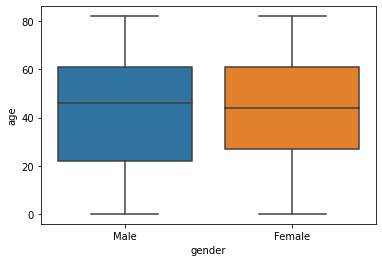

In [23]:
sns.boxplot( df['gender'], df['age'])   #No outliers in age

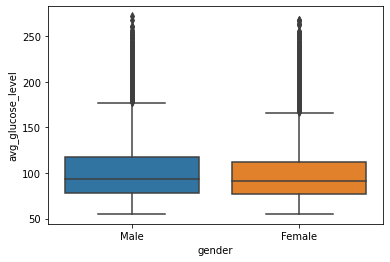

In [24]:
sns.boxplot( df['gender'], df['avg_glucose_level']) #glucose 

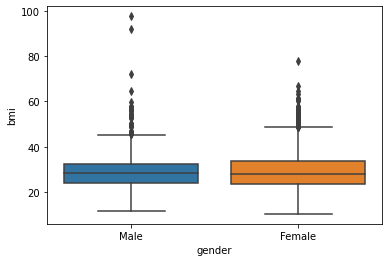

In [25]:
sns.boxplot( df['gender'], df['bmi'])   

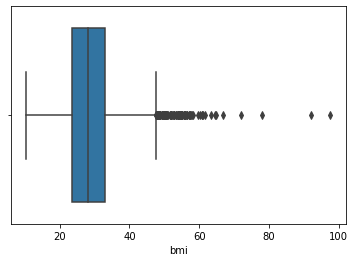

In [26]:
sns.boxplot(df['bmi'])  # As BMI as some unrealstic entries, we will remove these outliers

In [27]:
Q1 = np.percentile(df['bmi'], 25)
Q3 = np.percentile(df['bmi'], 75)

# Interquartile range
IQR = Q3 - Q1
outlier_step = 1.5 * IQR

# Outliers indices
outliers_indices = df[(df['bmi'] < Q1 - outlier_step) | (df['bmi'] > Q3 + outlier_step )].index

In [28]:
#dropping outliers
df = df.drop(df[outliers_indices], axis = 0)

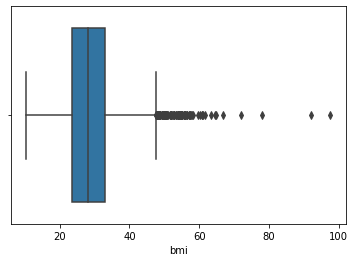

In [29]:
sns.boxplot(df['bmi'])

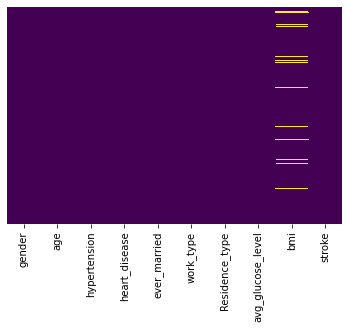

In [30]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [31]:
df['bmi'].isna().value_counts()

False    4908
True      201
Name: bmi, dtype: int64

In [32]:
#filling null values of BMI with its median
df['bmi'].fillna(df['bmi'].median(), inplace = True)

In [33]:
df['bmi'].isna().value_counts()

False    5109
Name: bmi, dtype: int64

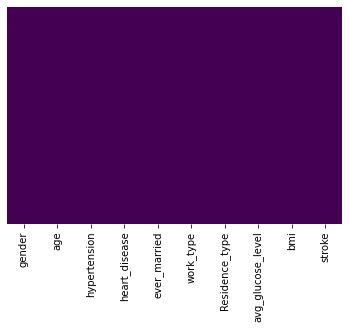

In [34]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') #No nan values

In [35]:
#calculating inter quartile range for bmi
q3, q1 = np.percentile(df['bmi'], [75 ,25])
iqr = q3 - q1

In [36]:
#removing outliers for bmi
outlier_step = 1.5 * iqr

# Outliers indices
outliers_indices = df[(df['bmi'] < q1 - outlier_step) | (df['bmi'] > q3 + outlier_step )].index

#droping rows
df.drop(outliers_indices, axis = 0, inplace = True)

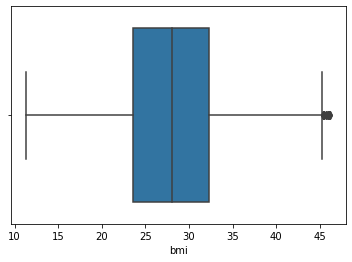

In [37]:
sns.boxplot(df['bmi'])

In [38]:
df.shape

(4983, 10)

# Exploratory Data Analysis

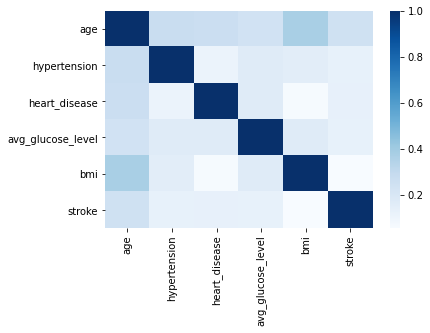

In [39]:
sns.heatmap(df.corr(), cmap = 'Blues')

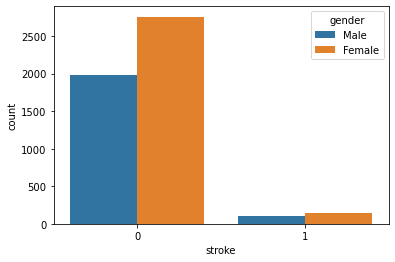

In [40]:
sns.countplot('stroke', data = df, hue = 'gender')

In [41]:
df['gender'].value_counts()

Female    2895
Male      2088
Name: gender, dtype: int64

In [42]:
df.loc[(df['stroke'] == 1) & (df['gender'] == 'Female')].shape

(138, 10)

In [43]:
df.loc[(df['stroke'] == 1) & (df['gender'] == 'Male')].shape

(108, 10)

In [44]:
print('Chances for female: ', 136/2880 * 100, '%')
print('Chances for male: ', 106/2082 * 100, '%')

Chances for female:  4.722222222222222 %
Chances for male:  5.091258405379443 %


In [45]:
# people who had stroke
df_stroke = df.loc[df['stroke'] == 1]

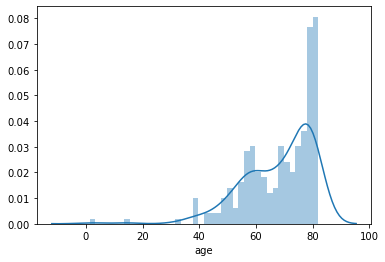

In [46]:
sns.distplot(df_stroke['age'], bins = 40)

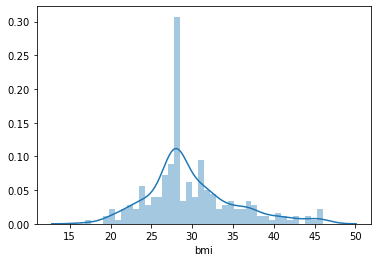

In [47]:
sns.distplot(df_stroke['bmi'], bins = 40)

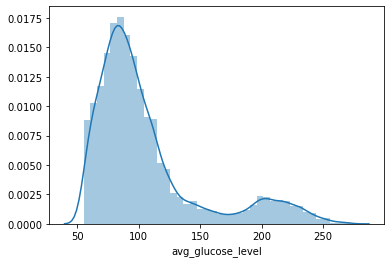

In [48]:
sns.distplot(df['avg_glucose_level'], bins = 40)

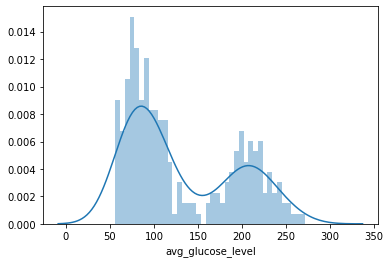

In [49]:
sns.distplot(df_stroke['avg_glucose_level'], bins = 40)

In [50]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

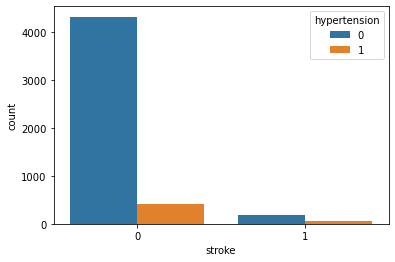

In [51]:
sns.countplot('stroke', data = df, hue = 'hypertension')

In [52]:
df['hypertension'].value_counts()

0    4506
1     477
Name: hypertension, dtype: int64

In [53]:
df_stroke.loc[df_stroke['hypertension'] == 0].shape

(181, 10)

In [54]:
df_stroke.loc[df_stroke['hypertension'] == 1].shape

(65, 10)

In [55]:
print('Chances for people without hypertension: ', 179/4488 * 100, '%')
print('Chances for people with hypertension: ', 63/474 * 100, '%')

Chances for people without hypertension:  3.988413547237077 %
Chances for people with hypertension:  13.291139240506327 %


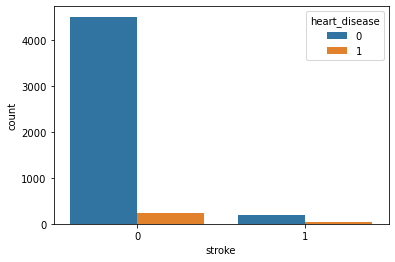

In [56]:
sns.countplot('stroke', data = df, hue = 'heart_disease')

In [57]:
df['heart_disease'].value_counts()

0    4708
1     275
Name: heart_disease, dtype: int64

In [58]:
df_stroke.loc[df_stroke['heart_disease'] == 0].shape

(199, 10)

In [59]:
df_stroke.loc[df_stroke['heart_disease'] == 1].shape

(47, 10)

In [60]:
print('Chances for people without heart_disease: ', 195/4688 * 100, '%')
print('Chances for people with heart_disease: ', 47/274 * 100, '%')

Chances for people without heart_disease:  4.159556313993174 %
Chances for people with heart_disease:  17.153284671532848 %


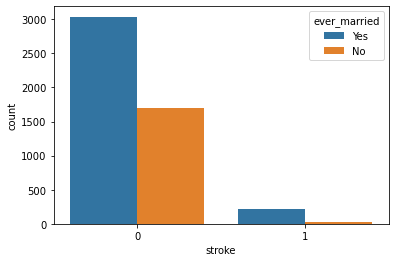

In [61]:
sns.countplot('stroke', data = df, hue = 'ever_married')

In [62]:
df['ever_married'].value_counts()

Yes    3255
No     1728
Name: ever_married, dtype: int64

In [63]:
df_stroke.loc[df_stroke['ever_married'] == 'Yes'].shape

(217, 10)

In [64]:
df_stroke.loc[df_stroke['ever_married'] == 'No'].shape

(29, 10)

In [65]:
print('Chances for married: ', 214/3239 * 100, '%')
print('Chances for single: ', 28/1723 * 100, '%')

Chances for married:  6.606977462179684 %
Chances for single:  1.625072547881602 %


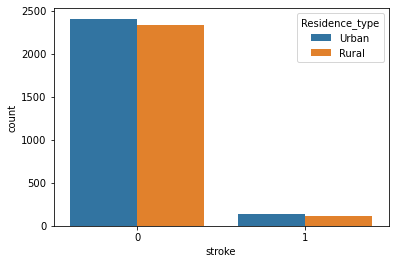

In [66]:
sns.countplot('stroke', data = df, hue = 'Residence_type')

In [67]:
df['Residence_type'].value_counts()

Urban    2538
Rural    2445
Name: Residence_type, dtype: int64

In [68]:
df_stroke.loc[df_stroke['Residence_type'] == 'Urban'].shape

(133, 10)

In [69]:
df_stroke.loc[df_stroke['Residence_type'] == 'Rural'].shape

(113, 10)

In [70]:
print('Chances for urban: ', 130/2528 * 100, '%')
print('Chances for rural: ', 112/2434 * 100, '%')

Chances for urban:  5.1424050632911396 %
Chances for rural:  4.6014790468364835 %


# Key insights

More men had strokes than women

More old people had strokes

Most of the people who had strokes 1) were diabatic /
                                         2) had hypertension /
                                         3) had heart disease /
                                         4) were married (can be related to age as most of the old people are married) /
                                         5) high glucose level

In [71]:
#pickling for later use
import pickle
df.to_pickle('stroke_cleaned_data.pkl')
